## Importing necessary libraries

## Mounting Google Drive to import our data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
path = '/content/drive/MyDrive/flower'
train_datagen = ImageDataGenerator(rescale = 1/255)

## Image Pre-processing

In [ ]:
train = train_datagen.flow_from_directory(path, target_size=(256, 256),class_mode=None,batch_size=305) 

Found 843 images belonging to 1 classes.


In [44]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip(
            "horizontal", input_shape=(256, 256, 3)),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
        tf.keras.layers.experimental.preprocessing.RandomFlip(
            mode="horizontal_and_vertical")
    ]
)

In [ ]:
len(train)

3

### Normalization of image

In [ ]:
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb
import numpy as np
X =[]
Y =[]
for i in range(len(train)):
  for img in train[i]:
    try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0])
      Y.append(lab[:,:,1:] / 128)
    except:
      print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,))
print(X.shape)
print(Y.shape)

(843, 256, 256, 1)
(843, 256, 256, 2)


In [ ]:
for i in range(len(train)):
  print(len(train[i]))

305
305
233


## Model

In [47]:
import tensorflow.keras.layers as layers  
import keras
model = keras.Sequential([
    #Encoding the data
    
    layers.Input(shape=(256,256,1)),
    #data_augmentation,
    layers.Conv2D(64, (3,3), activation='relu', padding='same', strides=2),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.Conv2D(128, (3,3), activation='relu', padding='same', strides=2),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.Conv2D(256, (3,3), activation='relu', padding='same', strides=2),
    layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),

    #Decoding the data
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.Conv2D(16, (3,3), activation='relu', padding='same'),
    layers.Conv2D(2, (3, 3), activation='tanh', padding='same'),
    layers.UpSampling2D((2, 2))
    ])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 conv2d_40 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_41 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 conv2d_42 (Conv2D)          (None, 64, 64, 256)       295168    
                                                                 
 conv2d_43 (Conv2D)          (None, 32, 32, 256)       590080    
                                                                 
 conv2d_44 (Conv2D)          (None, 32, 32, 512)       1180160   
                                                                 
 conv2d_45 (Conv2D)          (None, 32, 32, 512)      

### Fitting the model

In [48]:
model.compile(optimizer='adamax', loss='mse' , metrics=['accuracy'])
model.fit(X,Y,validation_split=0.2, epochs=500)


Epoch 1/500
22/22 [==============================] - 12s 346ms/step - loss: 0.1595 - accuracy: 0.4970 - val_loss: 0.0446 - val_accuracy: 0.6220
Epoch 2/500
22/22 [==============================] - 7s 308ms/step - loss: 0.0410 - accuracy: 0.6553 - val_loss: 0.0468 - val_accuracy: 0.6222
Epoch 3/500
22/22 [==============================] - 7s 314ms/step - loss: 0.0407 - accuracy: 0.6561 - val_loss: 0.0442 - val_accuracy: 0.6235
Epoch 4/500
22/22 [==============================] - 7s 319ms/step - loss: 0.0412 - accuracy: 0.6563 - val_loss: 0.0439 - val_accuracy: 0.6235
Epoch 5/500
22/22 [==============================] - 7s 324ms/step - loss: 0.0406 - accuracy: 0.6563 - val_loss: 0.0436 - val_accuracy: 0.6235
Epoch 6/500
22/22 [==============================] - 7s 322ms/step - loss: 0.0407 - accuracy: 0.6563 - val_loss: 0.0435 - val_accuracy: 0.6235
Epoch 7/500
22/22 [==============================] - 7s 323ms/step - loss: 0.0402 - accuracy: 0.6563 - val_loss: 0.0433 - val_accuracy: 0.623

In [ ]:
!pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
len(X)

0

In [ ]:
# Create and train a new model instance.
#model = create_model()
model.fit(X, Y, epochs=500)

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.


Epoch 1/500
27/27 [==============================] - 41s 493ms/step - loss: 0.1091 - accuracy: 0.6450
Epoch 2/500
27/27 [==============================] - 8s 281ms/step - loss: 0.0420 - accuracy: 0.6477
Epoch 3/500
27/27 [==============================] - 8s 283ms/step - loss: 0.0418 - accuracy: 0.6496
Epoch 4/500
27/27 [==============================] - 8s 282ms/step - loss: 0.0415 - accuracy: 0.6497
Epoch 5/500
27/27 [==============================] - 8s 287ms/step - loss: 0.0414 - accuracy: 0.6497
Epoch 6/500
27/27 [==============================] - 8s 285ms/step - loss: 0.0411 - accuracy: 0.6497
Epoch 7/500
27/27 [==============================] - 8s 294ms/step - loss: 0.0411 - accuracy: 0.6497
Epoch 8/500
27/27 [==============================] - 8s 289ms/step - loss: 0.0409 - accuracy: 0.6497
Epoch 9/500
27/27 [==============================] - 8s 292ms/step - loss: 0.0410 - accuracy: 0.6497
Epoch 10/500
27/27 [==============================] - 8s 292ms/step - loss: 0.0410 - accur

In [49]:
model.evaluate(X,Y, verbose=2)
model.save('my_model.h5') 

27/27 - 3s - loss: 0.0110 - accuracy: 0.8636 - 3s/epoch - 96ms/step


In [62]:
plt.figure(0)
plt.plot(model.history.history['accuracy'], label='training accuracy')
plt.plot(model.history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(model.history.history['loss'], label='training loss')
plt.plot(model.history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

KeyError: ignored

<Figure size 640x480 with 0 Axes>

In [ ]:
import keras
# Define a new model that outputs the feature maps for each layer
layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)

## Coloring the images

In [66]:
test_path = '/content/drive/MyDrive/testing/test'
temp='/content/drive/MyDrive/testing/test/pexels-ekaterina-belinskaya-4744877.jpg'
import os
import tensorflow as tf
from skimage.transform import resize
test = os.listdir(test_path)
print (test)
colorizer = []
for imgName in test:
  img = tf.keras.utils.img_to_array(tf.keras.utils.load_img('/content/drive/MyDrive/testing/test/'+imgName))
   # importing the test data
  #img = tf.keras.utils.img_to_array(tf.keras.utils.load_img(t))
  img = resize(img ,(256,256)) # resizing the image to 256*256
  colorizer.append(img)
colorizer = np.array(colorizer, dtype = 'uint8')
colorizer = rgb2lab(1.0/255*colorizer)[:,:,:,0] # storing the grayscale part in colorizer
colorizer = colorizer.reshape(colorizer.shape+(1,))
print(colorizer.shape)

['pexels-ekaterina-belinskaya-4744877.jpg', 'output-onlinejpgtools (1).jpg', 'output-onlinejpgtools.jpg']
(3, 256, 256, 1)


In [ ]:
img=colorizer[1]

In [ ]:
activations = activation_model.predict(img)

8/8 [==============================] - 0s 9ms/step


In [ ]:
import numpy as np
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [64]:
for i in range(0,15):
  layer_names = model.layers[i].name
layer_names

'conv2d_51'

In [68]:
# Create a list of layer names to visualize
layer_names = ['conv2d_39', 'conv2d_40', 'conv2d_41', 'conv2d_42', 'conv2d_43', 'conv2d_44', 'conv2d_45', 'conv2d_46', 'conv2d_47', 'up_sampling2d_9', 'conv2d_48', 'up_sampling2d_10', 'conv2d_49', 'conv2d_50', 'conv2d_51', 'up_sampling2d_11']
# Define a new model to output the feature maps for the selected layers
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=[model.get_layer(layer_name).output for layer_name in layer_names])
# Generate the feature maps for the input image
feature_maps = visualization_model.predict(colorizer[0])

8/8 [==============================] - 0s 9ms/step


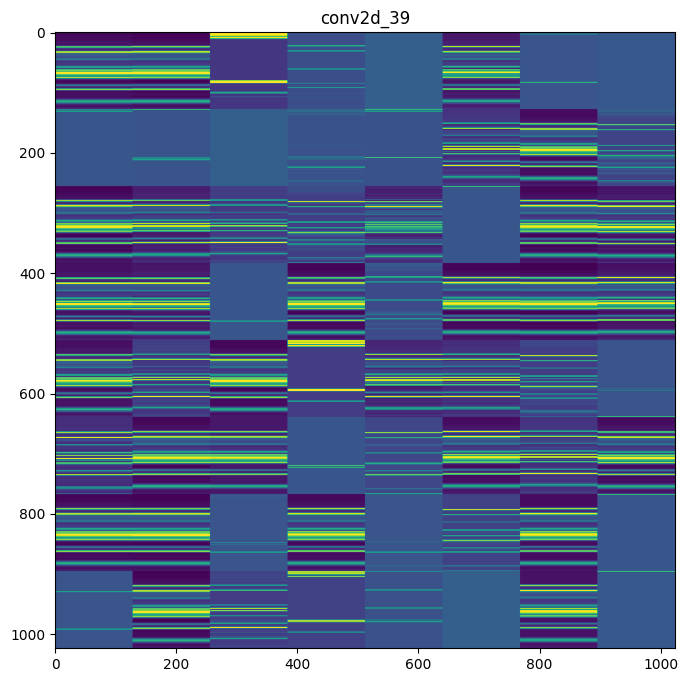

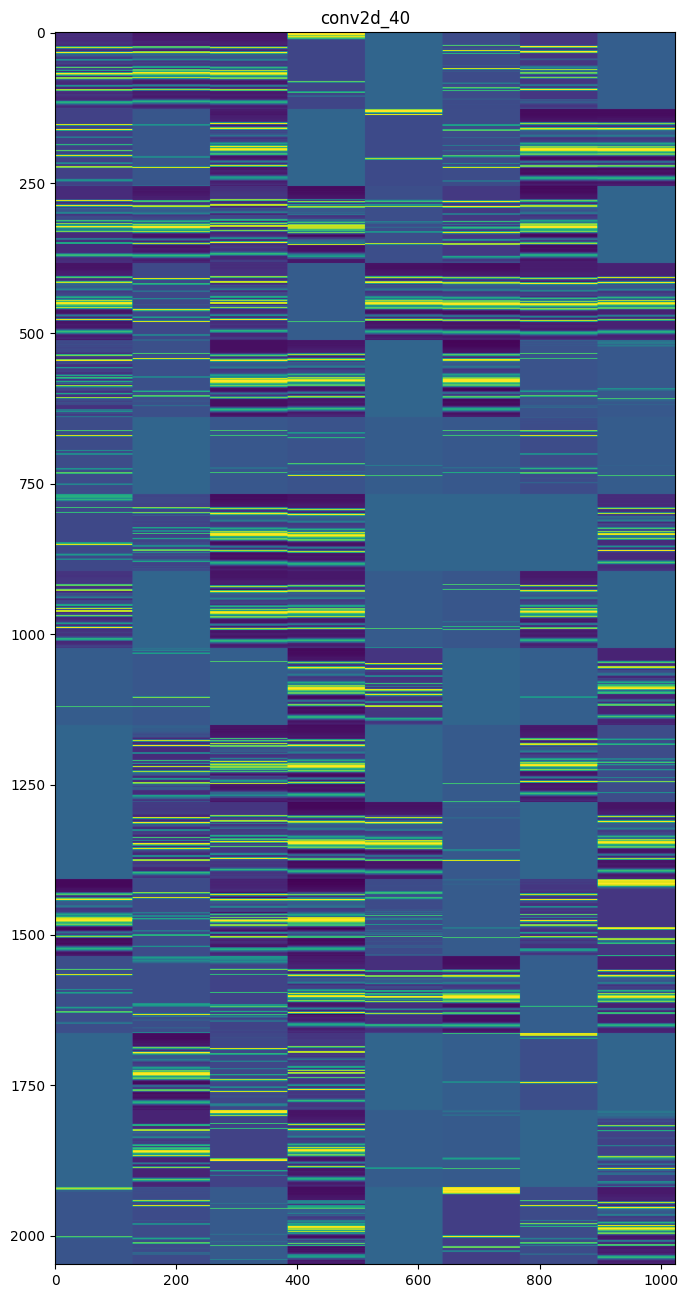

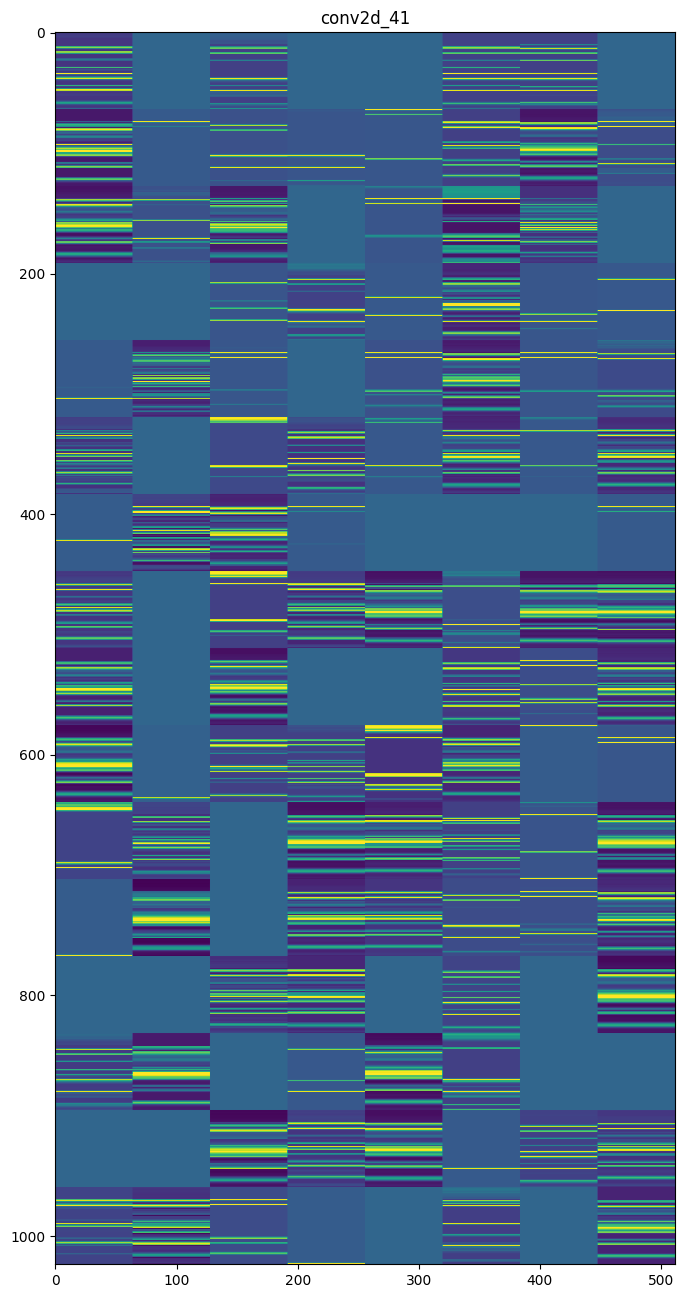

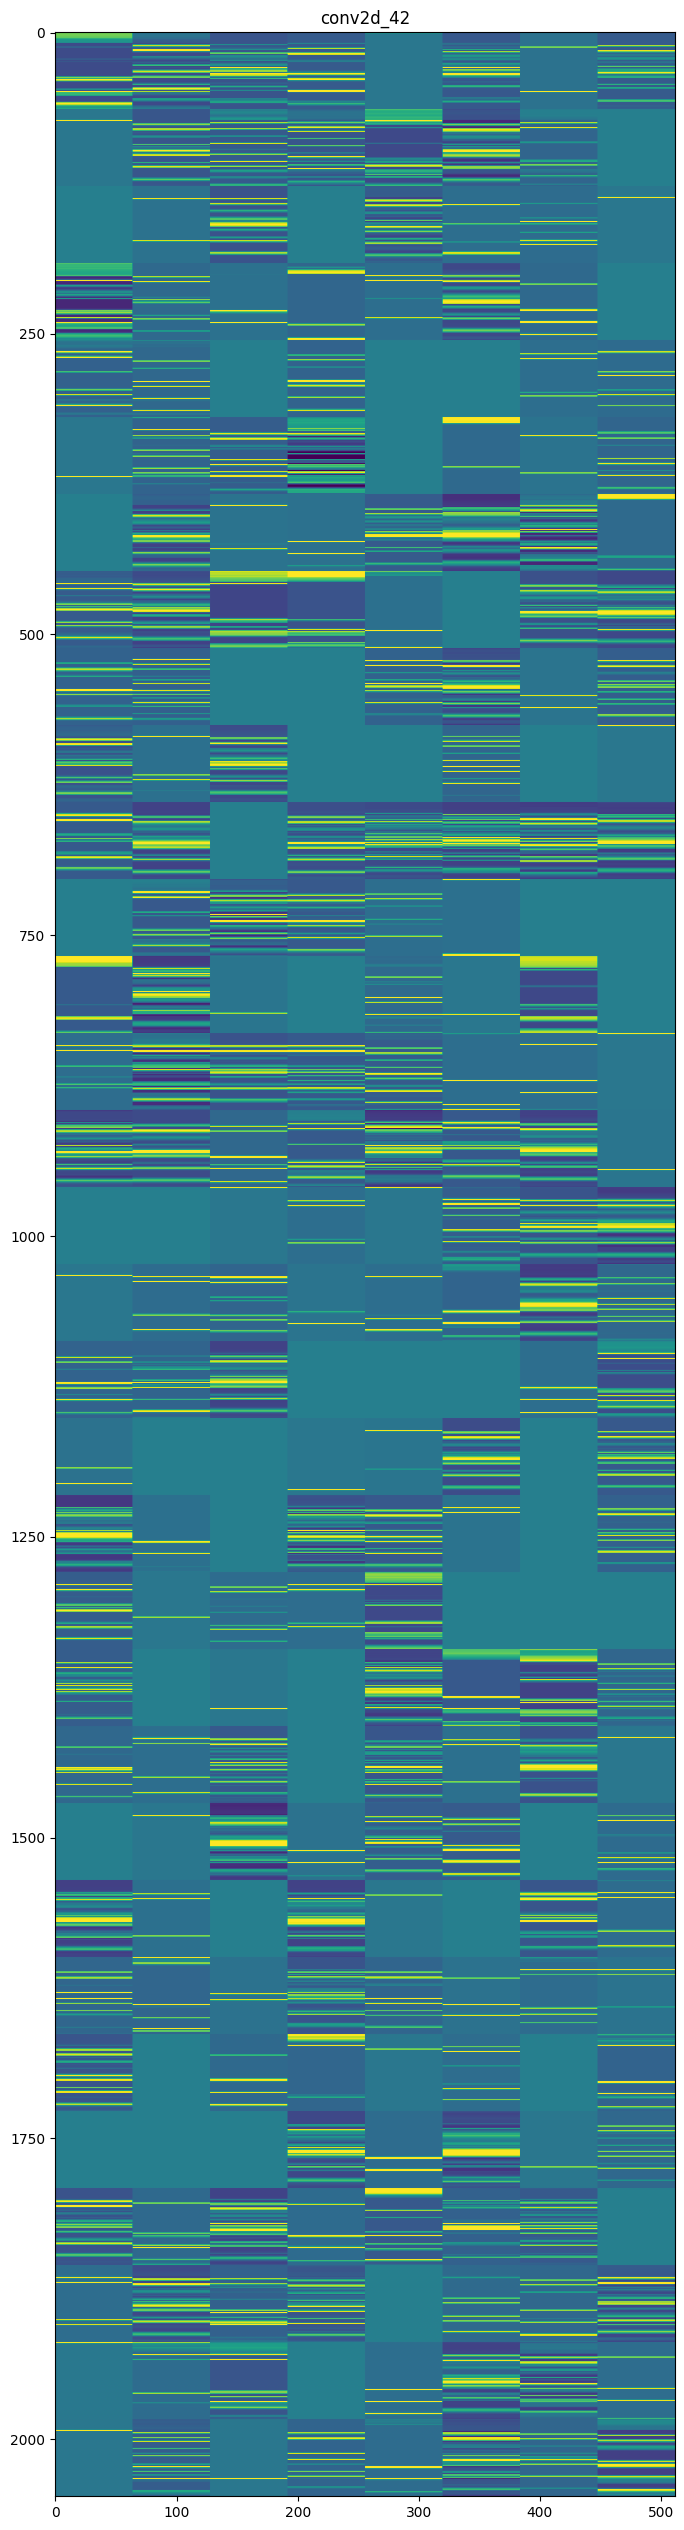

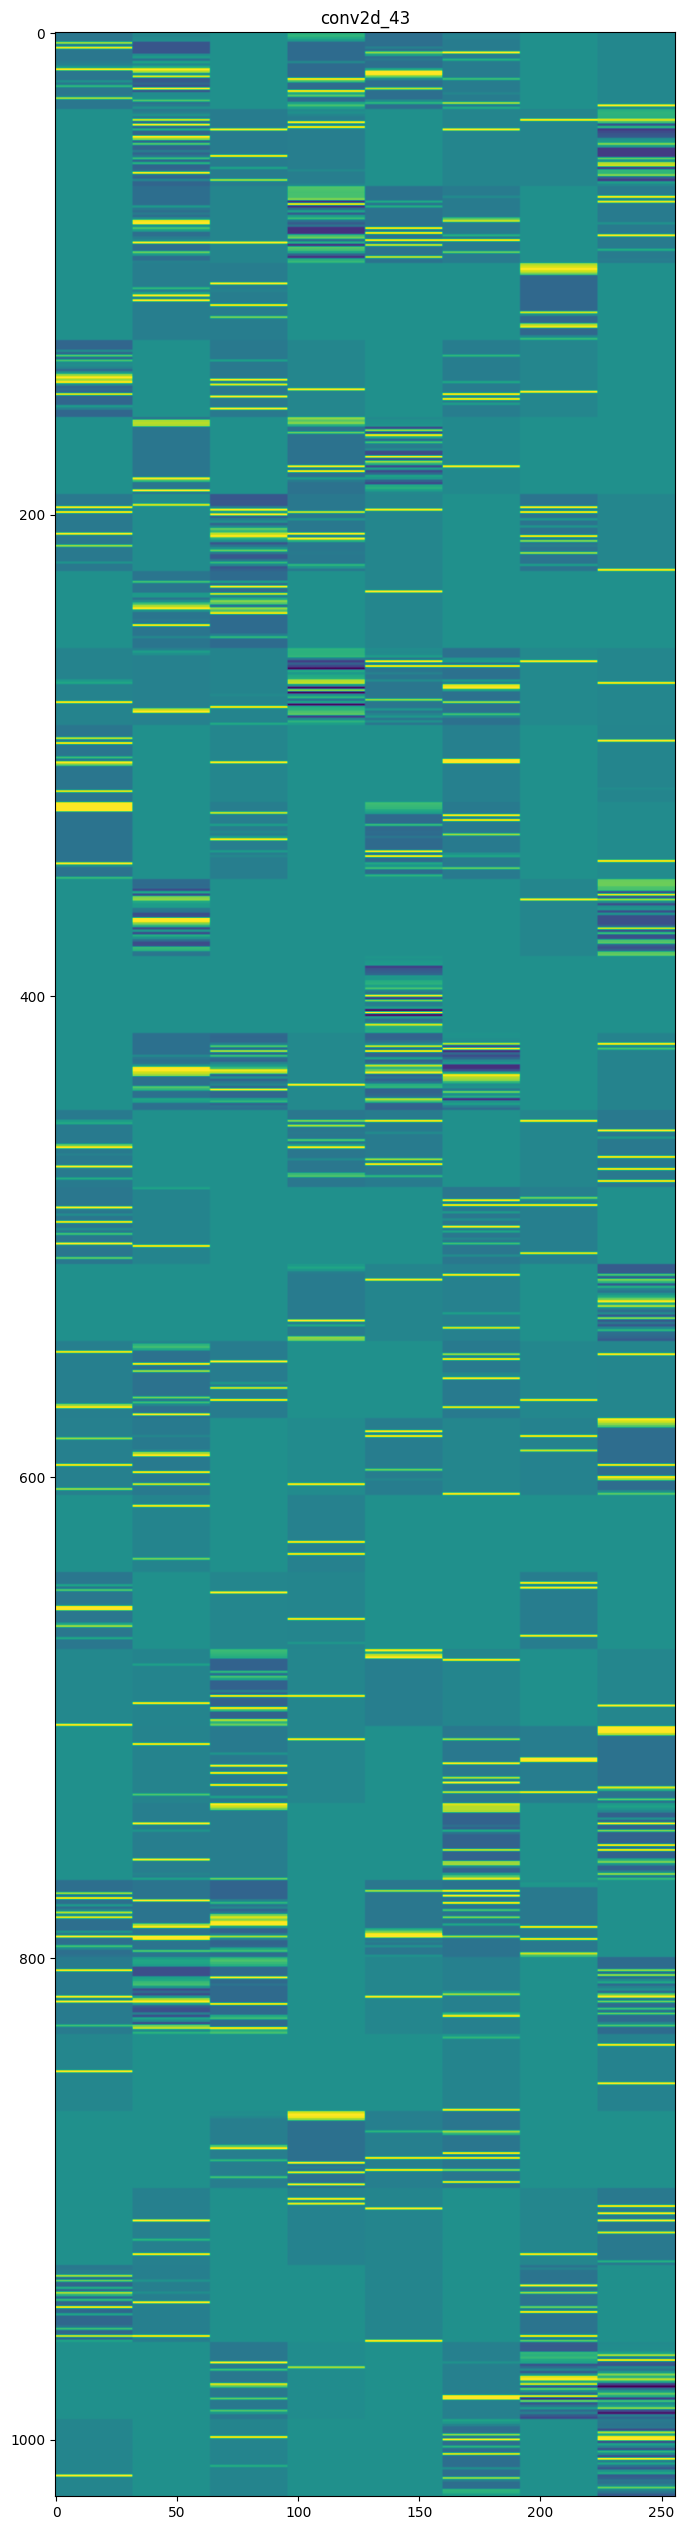

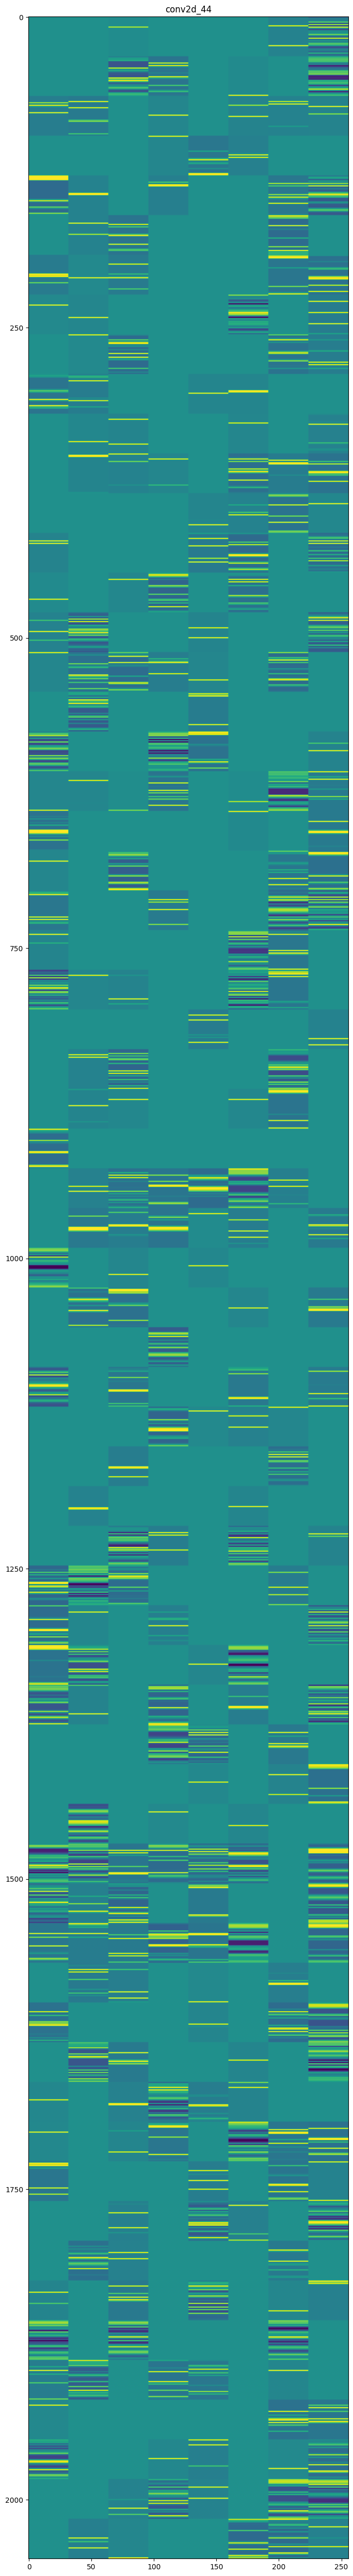

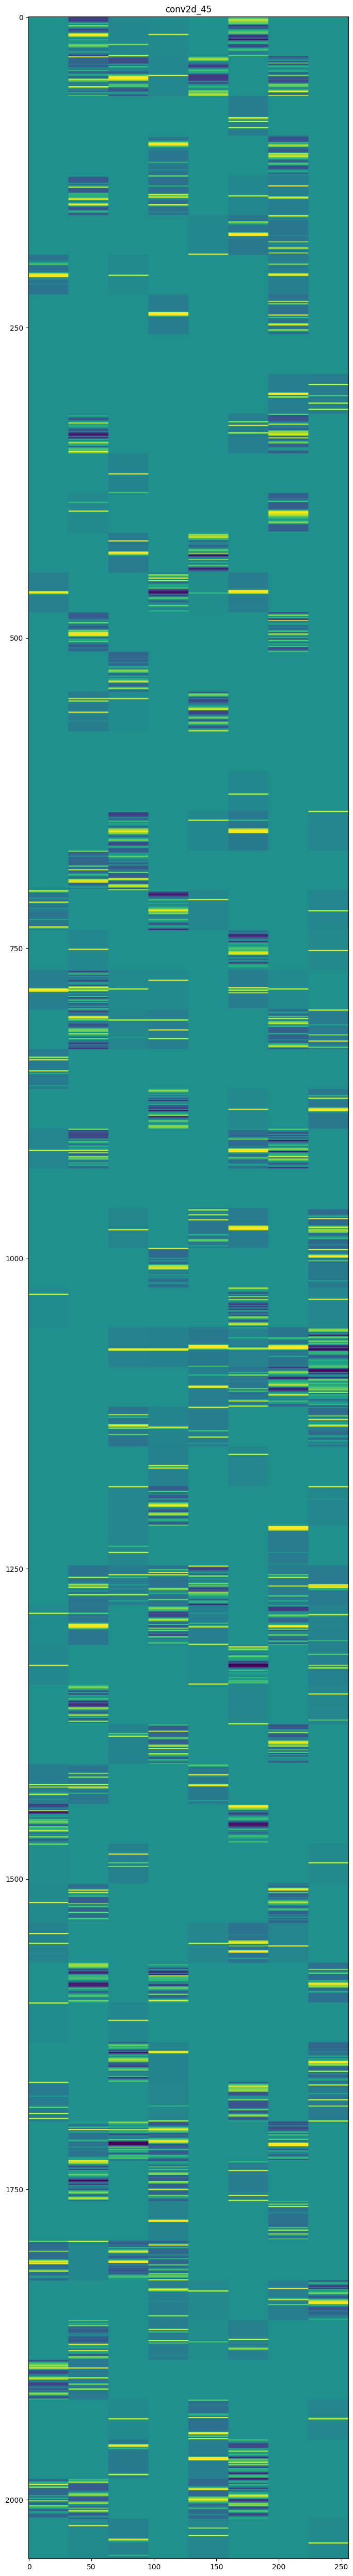

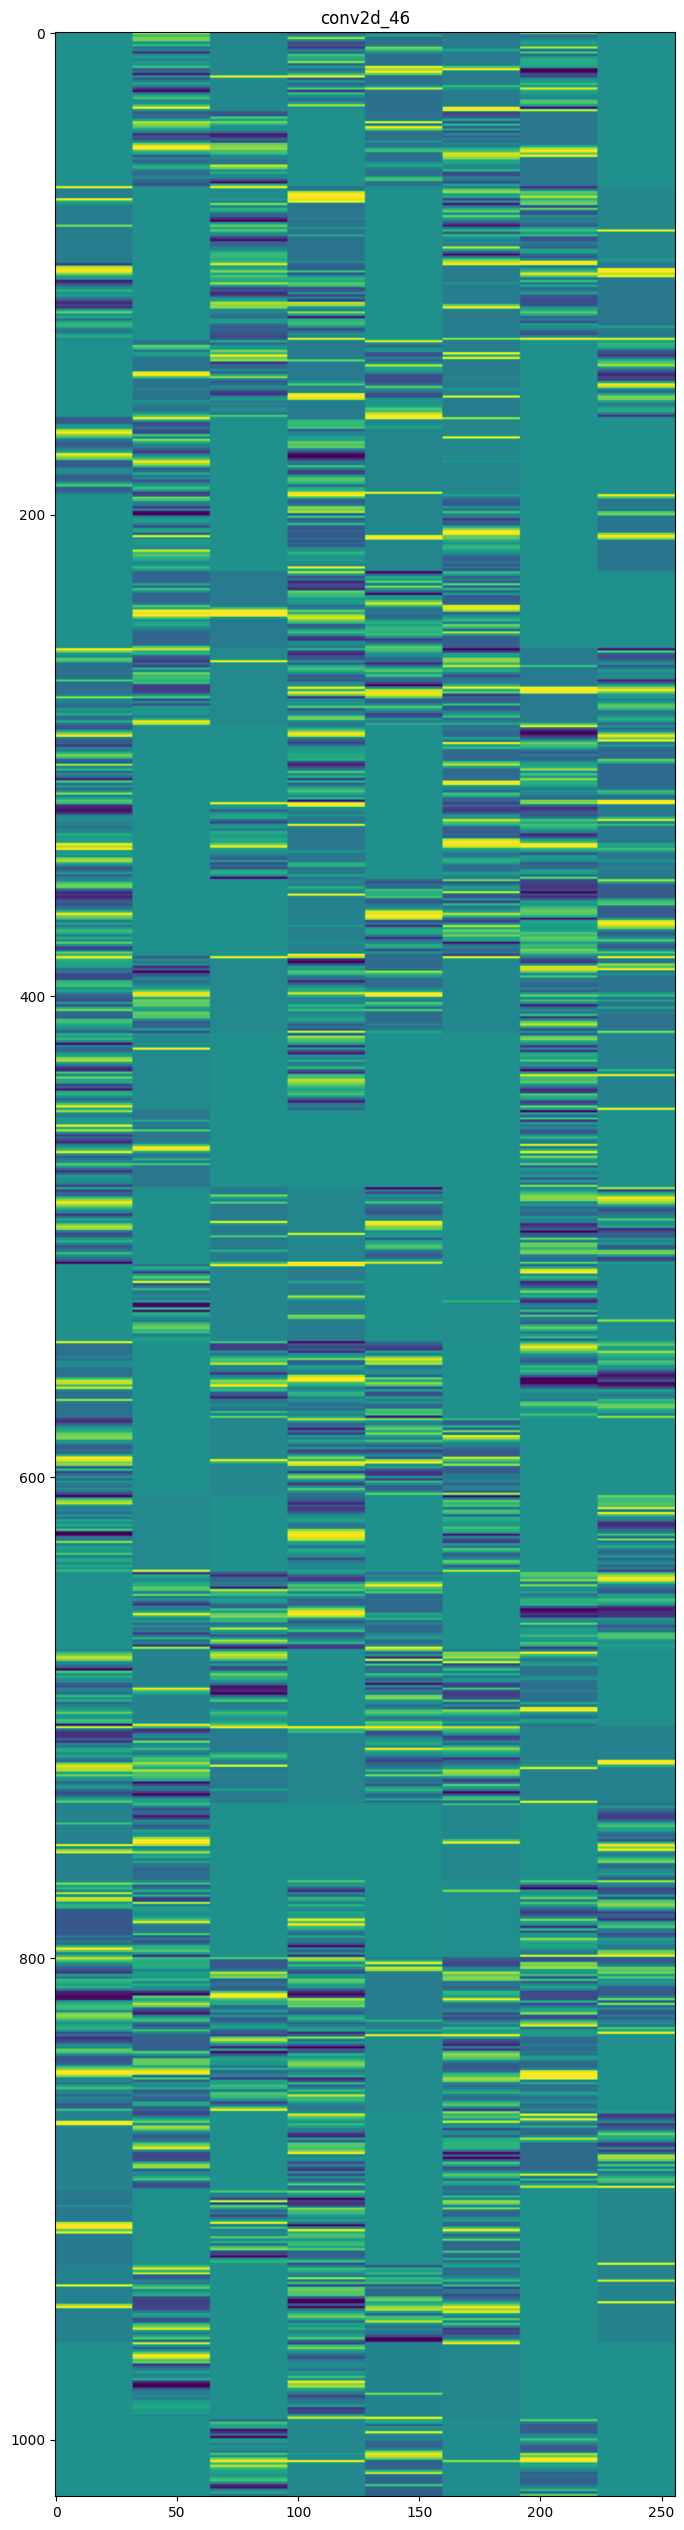

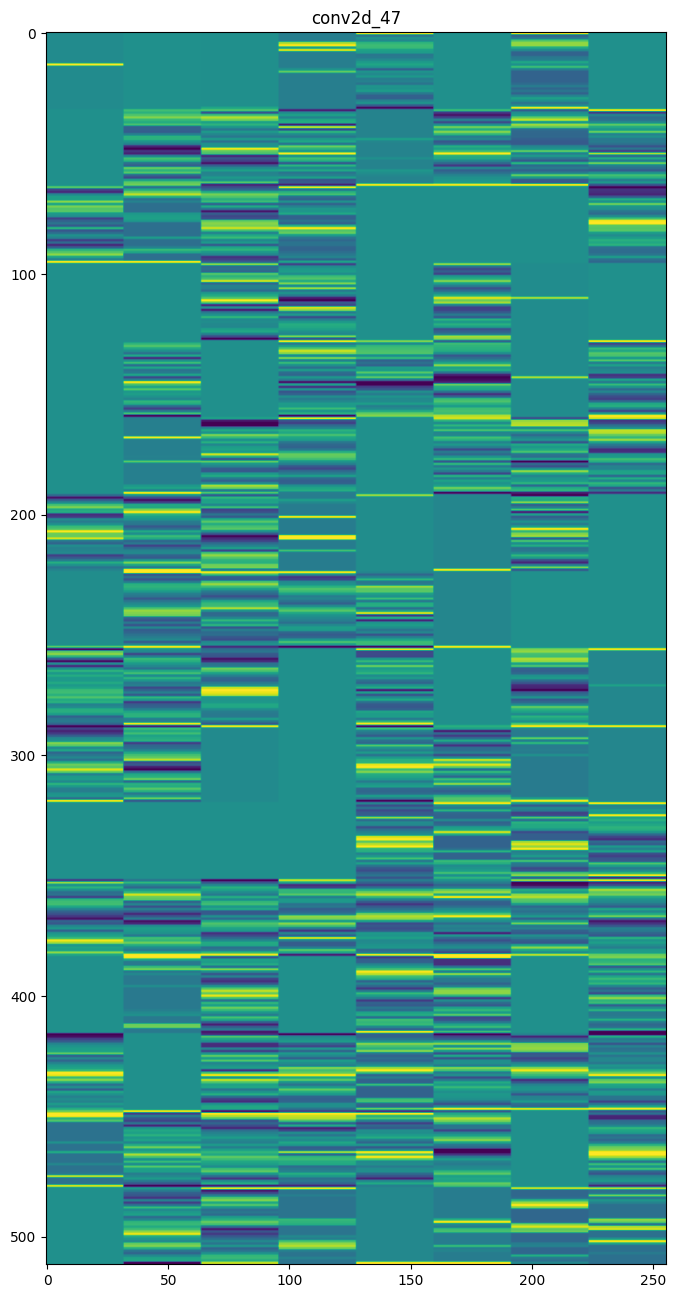

ValueError: ignored

In [70]:
epsilon = 1e-4
for layer_name, feature_map in zip(layer_names, feature_maps):
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size = feature_map.shape[1]  # size of the feature map
    n_cols = n_features // 8  # number of columns to visualize (max 8)
    
    # Create a grid of features
    display_grid = np.zeros((size*n_cols, 8*size))
    
    for col in range(n_cols):
        for row in range(8):
            if col*8+row < n_features:
                channel_image = feature_map[0, :, :, col*8+row]
                channel_image -= channel_image.mean()  # post-process the feature to make it visually palatable
                channel_image /= (channel_image.std()+epsilon)
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col*size : (col+1)*size, row*size : (row+1)*size] = channel_image
    
    # Display the grid of features
    scale = 1. / size
    plt.figure(figsize=(scale*display_grid.shape[1], scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.show()

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os
import numpy as np
import matplotlib.pyplot as plt

8/8 [==============================] - 0s 9ms/step
(256, 128, 1, 128)
(256, 64, 1, 128)
(256, 64, 1, 256)
(256, 32, 1, 256)
(256, 32, 1, 512)


<ipython-input-60-922613dabd5a>:43: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


(256, 32, 1, 512)
(256, 32, 1, 256)
(256, 32, 1, 128)
(256, 64, 2, 128)


ValueError: ignored

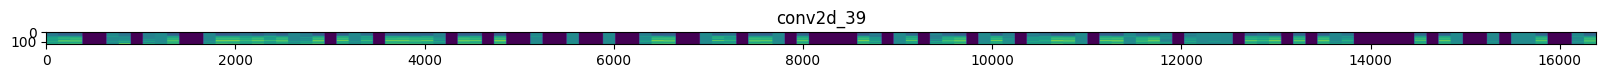

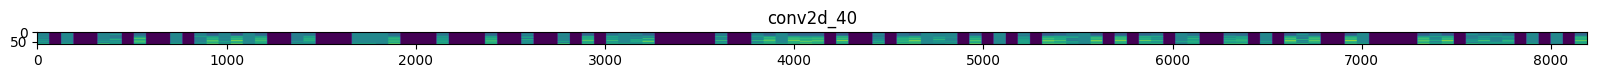

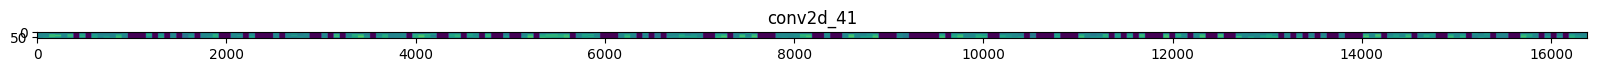

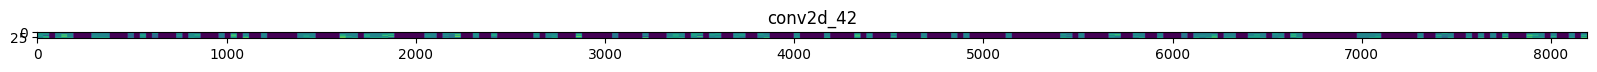

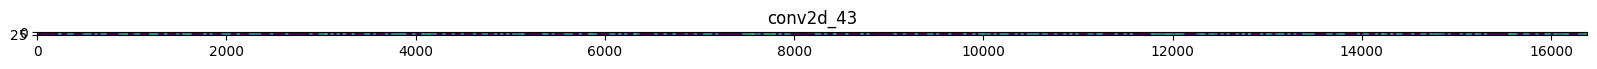

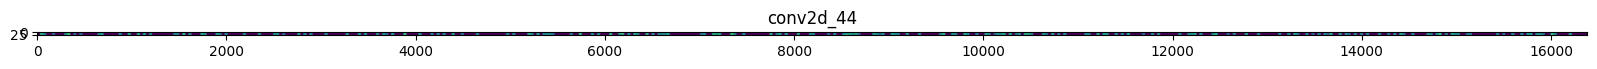

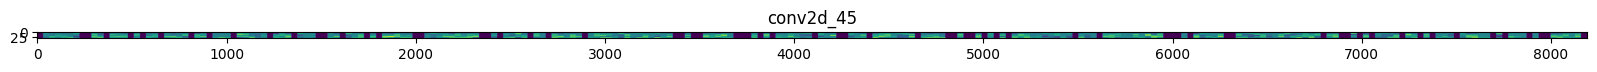

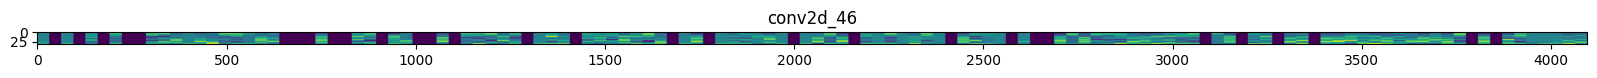

In [60]:
img_path='/content/drive/MyDrive/testing/test/output-onlinejpgtools (1).jpg' #dog
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = img = tf.keras.utils.img_to_array(tf.keras.utils.load_img(img_path))
# Convert ht image to Array of dimension (150,150,3)
#x   = img_to_array(img)                           
#x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
#x   =rgb2lab(1.0/255*x)
colorizer=[]
img = resize(img ,(256,256)) # resizing the image to 256*256
colorizer.append(img)
colorizer = np.array(colorizer, dtype = 'uint8')
colorizer = rgb2lab(1.0/255*colorizer)[:,:,:,0] # storing the grayscale part in colorizer
colorizer = colorizer.reshape(colorizer.shape+(1,))
x=colorizer[0]
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [30]:
output = model.predict(colorizer) # predicting the colors i.e. A and  B channels
output = output * 128

1/1 [==============================] - 1s 833ms/step


In [32]:
# Coloring the images
from skimage.io import imsave
for i in range(len(output)):
    result = np.zeros((256, 256, 3)) # initializing empty array
    result[:,:,0] = colorizer[i][:,:,0] # storing grayscale part in result's zeroth channel
    result[:,:,1:] = output[i] # storing A and B color channel in 1 and 2 channel respectively
    imsave("/content/drive/MyDrive/testing/result/"+str(i)+".png", lab2rgb(result)) # converting to RGB and saving the image

In [ ]:
import pickle
file=open('model.pickle','wb')
pickle.dump(model,file)
file.close()

In [ ]:
model.save('my_model.h5') 